# Trabalho de Teleinformática e Redes 1

## Capa

### Nome do Simulador
**BITNET**

### Membros do Grupo

- **Bianca Neves da Silva** - Matrícula: 23/1013583


## Introdução

Este projeto tem como objetivo desenvolver uma simulação detalhada das camadas de enlace e física, abordando a implementação de protocolos e técnicas fundamentais para a comunicação em redes de dados. A simulação concentra-se em duas áreas principais:

1. **Camada de Enlace:** Nesta camada, são simulados protocolos de enquadramento, como Contagem de Caracteres e Inserção de Bytes, bem como mecanismos de detecção e correção de erros. Entre os métodos de detecção de erros, incluem-se o Bit de Paridade Par e o CRC (Cyclic Redundancy Check). Além disso, é implementado o Código de Hamming, que permite não apenas detectar, mas também corrigir erros, garantindo a integridade dos dados transmitidos.

2. **Camada Física:** Na camada física, o foco está na modulação de sinais, explorando técnicas tanto de banda-base quanto de portadora. A modulação banda-base abrange métodos como NRZ (Non-Return to Zero), Manchester e Bipolar, enquanto a modulação por portadora inclui ASK (Amplitude Shift Keying), FSK (Frequency Shift Keying) e 8-QAM (8-Quadrature Amplitude Modulation).

O trabalho tem como propósito proporcionar uma compreensão ampla do funcionamento dessas camadas em sistemas de comunicação digital, destacando suas funcionalidades, interdependências e desafios. A implementação foi realizada utilizando a linguagem Python e a interface gráfica foi desenvolvida com Streamlit, o que facilita a interação com o simulador. O código-fonte do projeto está hospedado no GitHub, permitindo um controle eficiente de versão e promovendo a colaboração entre desenvolvedores.

Por meio da integração das diferentes técnicas e protocolos abordados, este projeto busca oferecer uma ferramenta unificada para a análise e simulação das camadas de enlace e física. A proposta é auxiliar na compreensão prática dos processos envolvidos na comunicação digital, contribuindo para o aprendizado e a pesquisa na área de redes de computadores.


Nesta primeira parte, será abordado as modulações digitais, tais como NRZ-Polar, Manchester, Bipolar, ASK, FSK e 8-QAM


## Implementação

Descrição detalhada do desenvolvimento com diagramas ilustrativos, o funcionamento dos protocolos, procedimentos utilizados, bem como decisões tomadas relativas aos casos e detalhes de especificação que porventura estejam omissos no enunciado.

### Camada física

#### NRZ_Polar
Esse é o método mais simples de codificação. Se o bit recebido for 0, o sinal será -1. Se for 1, o sinal será 1.

In [30]:
# Non-Return-to-Zero (NRZ) polar modulation
def nrz_polar(bits, h=1, l=-1, bit_signal=100):
    signal = []
    for bit in bits:
        value = h if bit == 1 else l
        signal.extend([value] * bit_signal)
    return signal

Como observado, a função recebe uma string '0' ou '1' e se o bit for 0 ele vira -1, do contrário, se for 1 ele vira 1

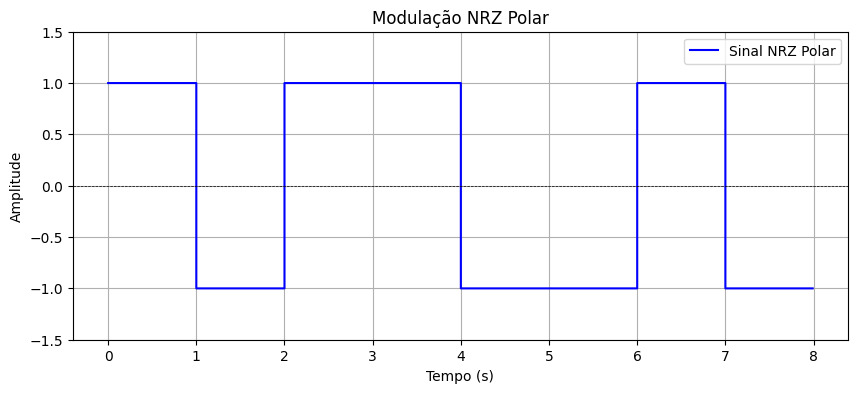

In [31]:
import matplotlib.pyplot as plt

bits = [1, 0, 1, 1, 0, 0, 1, 0]

bit_signal_length = 100
signal = nrz_polar(bits, bit_signal=bit_signal_length)

time = [i / bit_signal_length for i in range(len(signal))]

plt.figure(figsize=(10, 4))
plt.step(time, signal, where="post", color="blue", label="Sinal NRZ Polar")
plt.ylim(-1.5, 1.5)  # Definir os limites do eixo Y
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Modulação NRZ Polar")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.show()


#### Manchester
É uma codificação que trabalha com uma transição negativa-para-positiva representa o 1
binário e uma transição positiva-para-negativa representa o 0.
Alcança o mesmo nível de sincronização que a RZ, mas com
somente dois níveis de amplitude.

In [32]:
# Manchester modulation
def manchester(bits, h=1, l=-1, bit_signal=100):
    sig = []
    half_samples = bit_signal // 2
    for bit in bits:
        if bit == 1:
            sig.extend([h] * half_samples + [l] * half_samples)
        else:
            sig.extend([l] * half_samples + [h] * half_samples)
    return sig


Como visto, por ele possuir o mesmo sincronismo da nrz, ele utiliza a função na propria manchester

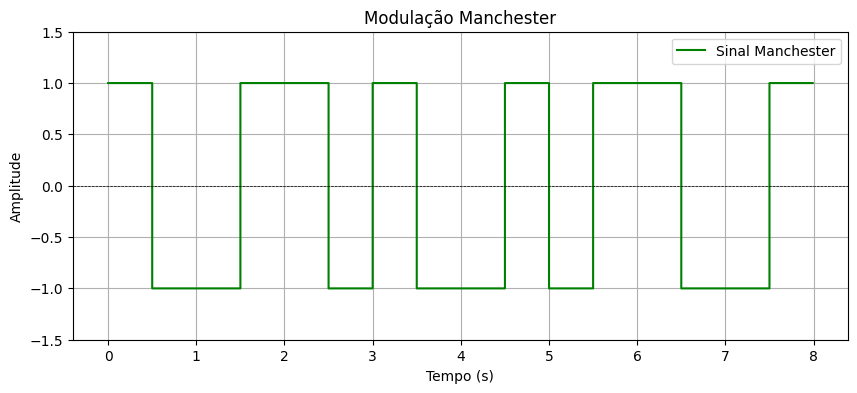

In [33]:
bits = [1, 0, 1, 1, 0, 0, 1, 0]

bit_signal_length = 100
signal = manchester(bits, bit_signal=bit_signal_length)

time = [i / bit_signal_length for i in range(len(signal))]

plt.figure(figsize=(10, 4))
plt.step(time, signal, where="post", color="green", label="Sinal Manchester")
plt.ylim(-1.5, 1.5)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Modulação Manchester")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.show()


#### Bipolar
Nesta modulação o sinal é codificado utilizando três níveis de voltagens: positivo, negativo e zero

O bit 0 serve para representar o bit 0
O bit 1 representa +1 e -1, onde o primeiro bit 1 é representado pela amplitude positiva, já o segundo será representado pela amplitude negativo, o terceiro pela positiva e assim segue.

In [34]:
def bipolar(bits, h=1, l=-1, zero=0, bit_signal=100):
    sig = []
    last_high = True
    for bit in bits:
        if bit == 1:
            value = h if last_high else l
            last_high = not last_high
        else:
            value = zero
        sig.extend([value] * bit_signal)
    return sig

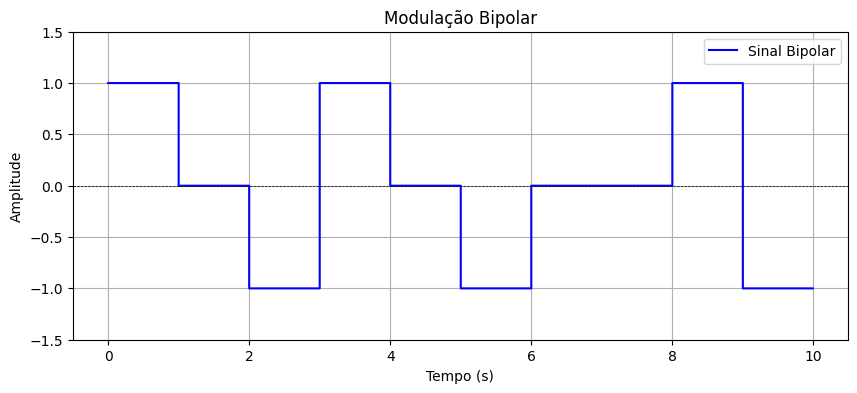

In [35]:

bits = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

bit_signal_length = 100
signal = bipolar(bits, bit_signal=bit_signal_length)

time = [i / bit_signal_length for i in range(len(signal))]

plt.figure(figsize=(10, 4))
plt.step(time, signal, where="post", color="blue", label="Sinal Bipolar")
plt.ylim(-1.5, 1.5)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Modulação Bipolar")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.show()


#### Modulação ASK
É uma modulação em que a amplitude de uma portadora é alterada de acordo com o valor dos bits do sinal de entrada, ou seja, os bits 1 representam uma amplitude, já os bits 0, são representados pela ausência de sinal

In [36]:
import numpy as np
def ask(bits, freq=1, amp1=1, amp0=0, bit_signal=100):
    # time vector for one bit duration
    time = np.linspace(0, 1, bit_signal)
    signal = []
    # generate the corresponding modulated waveform for the each bit
    for bit in bits:
        if bit == 1:
            amp = amp1
        else:
            amp = amp0
        # Create the carrier wave for the current bit and add to the signal
        signal.extend(amp * np.sin(2 * np.pi * freq * time))
    return signal

O sinal NRZ é utilizado na modulação ASK porque é uma representação simples e direta dos dados binários.

A função ask_modulation utiliza o sinal NRZ e o modula com uma onda portadora para criar um sinal ASK, onde a amplitude da portadora varia de acordo com os bits do sinal NRZ.

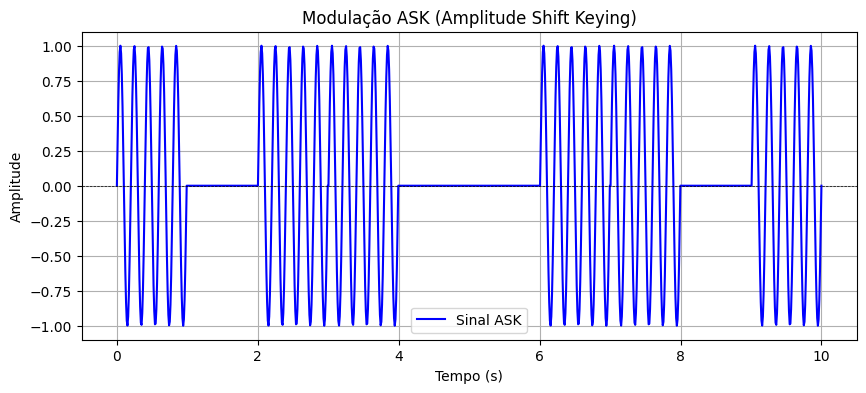

In [37]:

bits = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]

bit_signal_length = 100
freq = 5 
signal = ask(bits, freq=freq, bit_signal=bit_signal_length)

time = np.linspace(0, len(bits), len(signal))

plt.figure(figsize=(10, 4))
plt.plot(time, signal, color="blue", label="Sinal ASK")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Modulação ASK (Amplitude Shift Keying)")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.show()


#### Modulação FSK
Novamente é uma modulação em que a amplitude de uma portadora é alterada de acordo com o valor dos bits do sinal de entrada. Dessa vez, o bit 1 é representado por uma frequência alta. O bit 0 é representado por uma frequência baixa.

In [38]:
#Frequency Shift Keying (FSK) modulation
def fsk(bits, freq0=1, freq1=2, bit_signal=100):
    # time vector for one bit duration
    time = np.linspace(0, 1, bit_signal)
    signal = []
    # generate the corresponding modulated waveform for the each bit
    for bit in bits:
        # Select the frequency based on the current bit (freq1 for 1, freq0 for 0)
        if bit == 1:
            freq = freq1
        else:
            freq = freq0
        # Create the carrier wave for the current bit and add to the signal
        signal.extend(np.sin(2 * np.pi * freq * time))
    return signal


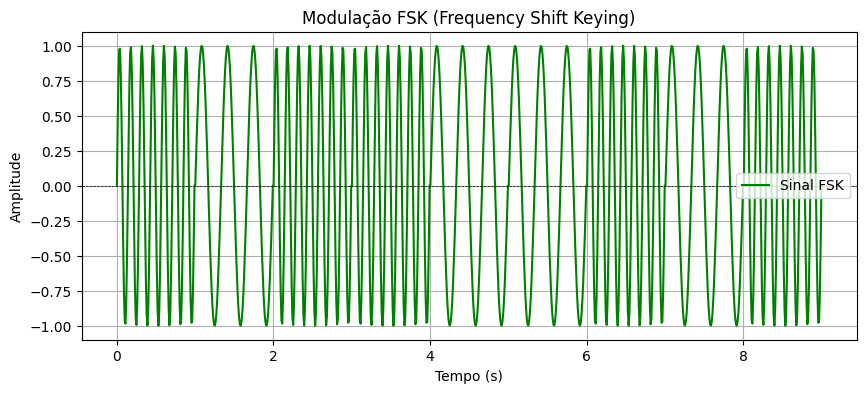

In [39]:

bits = [1, 0, 1, 1, 0, 0, 1, 0, 1]

bit_signal_length = 100
freq0 = 3 
freq1 = 7
signal = fsk(bits, freq0=freq0, freq1=freq1, bit_signal=bit_signal_length)

time = np.linspace(0, len(bits), len(signal))

plt.figure(figsize=(10, 4))
plt.plot(time, signal, color="green", label="Sinal FSK")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Modulação FSK (Frequency Shift Keying)")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.show()


#### Modulação 8-QAM

A modulação **8-QAM (Quadrature Amplitude Modulation)** é uma técnica de modulação que combina variações em amplitude e fase para transmitir dados de forma eficiente. No contexto da camada física, a 8-QAM é utilizada para representar grupos de 3 bits como pontos em uma constelação 2D, abrangendo valores de -3 a 3 para as coordenadas real e imaginária.

---

**Como a Função Funciona**

1. **Divisão dos Bits em Grupos de 3**:  
   Os bits são organizados em grupos de 3, cada grupo correspondendo a um símbolo na constelação. Cada símbolo representa uma combinação única de bits, totalizando 8 possíveis valores.

2. **Mapeamento dos Símbolos**:  
   Os grupos de 3 bits são convertidos para valores decimais e, em seguida, mapeados para coordenadas específicas na constelação. Essas coordenadas definem a amplitude (parte real) e a fase (parte imaginária) do símbolo.

3. **Geração do Sinal Modulado**:  
   Para cada símbolo, a função gera um sinal modulado combinando as partes real e imaginária. O resultado é uma sequência de números complexos que representam o sinal modulado em **8-QAM**.

---

A implementação da modulação **8-QAM** no projeto demonstra como diferentes combinações de amplitude e fase podem ser utilizadas para transmitir dados de forma mais eficiente, destacando-se como uma das técnicas avançadas exploradas na simulação da camada física.


In [40]:
#8-Quadrature Amplitude Modulation (8-QAM) modulation
def qam(bits, bit_signal=100):
    if len(bits) % 3 != 0:
        raise ValueError("Bits length must be a multiple of 3 for 8-QAM.")
    time = np.linspace(0, 1, bit_signal)
    signal = []
    # generate the corresponding modulated waveform for the each group of 3 bits
    for i in range(0, len(bits), 3):
        # Map 3 bits to an amplitude and phase
        bit3 = bits[i:i + 3]
        # Calculate the amplitude and phase based on the 3 bits
        amp = 1 + bit3[0]
        # The phase is calculated based on the 2nd and 3rd bits
        phase = (bit3[1] * 2 + bit3[2]) * (np.pi / 4)
        carrier = amp * np.sin(2 * np.pi * time + phase)
        signal.extend(carrier)
    return signal

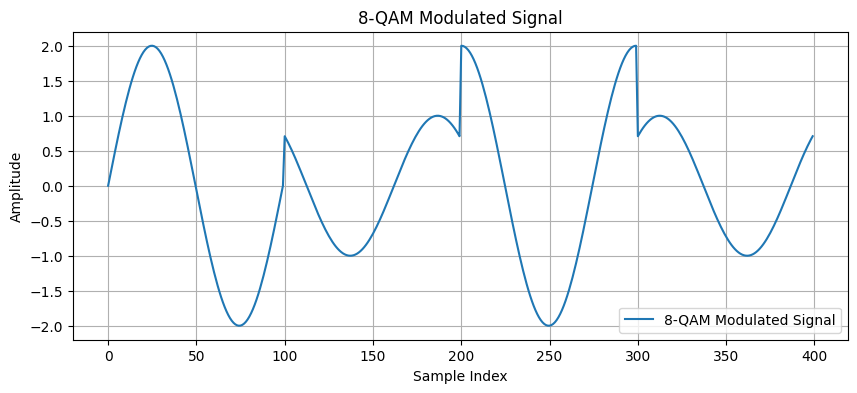

In [41]:
bits = [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]  # Representing four 3-bit groups
bit_signal = 100  # Samples per bit

# Generate the signal
qam_signal = qam(bits, bit_signal=bit_signal)

# Plot the 8-QAM signal
plt.figure(figsize=(10, 4))
plt.plot(qam_signal, label='8-QAM Modulated Signal')
plt.title('8-QAM Modulated Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Enlace 
A camada de enlace é responsável por gerenciar as conexões diretas entre dispositivos na mesma rede, organizando a transmissão de dados em quadros, gerenciando erros, controlando o acesso ao meio físico e endereçando os dispositivos na rede. Ela serve como um intermediário entre a camada física (que trata da transmissão real dos bits) e as camadas superiores que lidam com a lógica e a organização dos dados. Neste trabalho iremos apresentar protocolos de enquadramento de dados (Contagem de caracteres e inserção de bytes), protocolos de detecção de erro (Bit de Paridade Par e CRC) e o protocolo de correção de erros Hamming.

#### Contagem de Caracteres

A contagem de caracteres é uma técnica usada na camada de enlace para indicar o número de caracteres (ou bytes) que estão sendo transmitidos em um quadro. Esse método é uma forma de identificar o início e o fim de um quadro de dados, permitindo que o receptor saiba exatamente quantos caracteres processar.

A seguir tem como foi implementado no contexto do simulador;



In [42]:
FLAG = "01111110"  # Flag byte in binary (~)
ESC = "11111101"   # Escape byte in binary (\)

# transform text to binary
def text_to_bits(text):
    return ''.join(f"{ord(char):08b}" for char in text)

#transform binary to text
def bits_to_text(binary_data):
    chars = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    return ''.join(chr(int(char, 2)) for char in chars)

#count character framing
def count_character(data):
    frames = ""
    for frame in data:
        binary_data = text_to_bits(frame)
        byte_count = len(binary_data) // 8
        header = f"{byte_count:08b}"
        frames += header + binary_data
    return frames

#deframe character framing
def deframe_count_character(data):
    original_frames = []
    i = 0
    while i < len(data):
        byte_count = int(data[i:i+8], 2)
        i += 8 # move the index to the start
        binary_data = data[i:i + (byte_count * 8)] # get the binary data
        i += byte_count * 8 # move the index to the next frame
        original_frames.append(bits_to_text(binary_data))
    return original_frames

# Test the count_character and deframe_count_character functions
data = ["Hello", "World", "Test"]
framed_data = count_character(data)
print("Framed Data:", framed_data)

original_data = deframe_count_character(framed_data)
print("Original Data:", original_data)

Framed Data: 0000010101001000011001010110110001101100011011110000010101010111011011110111001001101100011001000000010001010100011001010111001101110100
Original Data: ['Hello', 'World', 'Test']


#### Inserção de Bytes

O protocolo de inserção de bytes refere-se a técnicas usadas para modificar, adicionar ou estruturar bytes em dados de comunicação, geralmente em contextos de transmissão de dados, armazenamento ou protocolos de comunicação. Essa inserção é essencial para diversos aspectos da comunicação digital, como formatação de dados, codificação e controle de erros.


In [43]:
#byte insertion framing
def byte_insertion(data):
    frames = ""
    for frame in data:
        binary_data = text_to_bits(frame)
        # Escape FLAG and ESC
        esc_data = binary_data.replace(FLAG, ESC + FLAG).replace(ESC, ESC + ESC)
        frames += FLAG + esc_data + FLAG
    return frames

#deframe byte insertion
def deframe_byte_insertion(data):
    frames = []
    i = 0
    while i < len(data):
        # Find the next FLAG
        start = data.find(FLAG, i)
        end = data.find(FLAG, start + len(FLAG))
        if start == -1 or end == -1:
            break
        # Extract the data between the flags
        raw_data = data[start + len(FLAG):end]
        # Remove the escapes
        unescaped_data = raw_data.replace(ESC + ESC, ESC).replace(ESC + FLAG, FLAG)
        frames.append(bits_to_text(unescaped_data))
        i = end + len(FLAG)
    return frames

def byte_insertion_framing_from_text(text):
    words = text.split()
    return byte_insertion(words)


def deframe_byte_insertion_to_text(data):
    frames = deframe_byte_insertion(data)
    return ' '.join(frames)

# Test the byte_insertion and deframe_byte_insertion functions
data = ["Hello", "World", "Test"]
framed_data = byte_insertion(data)
print("Framed Data:", framed_data)

Framed Data: 0111111001001000011001010110110001101100011011110111111001111110010101110110111101110010011011000110010001111110011111100101010001100101011100110111010001111110


Agora, na camada de enlace, nos temos os protocolos que realizam a detecção de erros, que são:

#### Bit de paridade par
O Bit de paridade par consiste em um método em que o último bit de um dado, representa 1, caso o número de 1 do dado seja impar, ou representa 0 caso o número de 1 do dado seja par. Ex: 11110. O bit 0 representa o bit de paridade par. Este método é eficaz caso o dado chegue ao receptor com algum dos bits modificados, e com base no bit de paridade, consegue verificar se houve ou não erro durante a transmissão

In [44]:
import zlib

# Error detection using parity bit
def parity_bit(data):
    count = data.count('1')
    p_bit = '0' if count % 2 == 0 else '1'
    return data + p_bit

# Check if the parity bit is correct
def check_parity_bit(data):
    p = data[:-1]
    p_bit = data[-1]
    count = p.count('1')
    expected_parity = '0' if count % 2 == 0 else '1'
    return p_bit == expected_parity

# Convert data to frames with parity bit
def parity_to_frames(data):
    return [parity_bit(frame) for frame in data]

# Check parity bit on frames
def parity_on_frames(data):
    return [check_parity_bit(frame) for frame in data]

O codigo acima ele percorre a mensagem e conta o número de 1 da mensagem, e com base no resto da divisão desse número, ele determina se o bit de paridade par será 1 ou 0, retornando a mensagem original com seu bit de paridade.

A outra função de verificação do bit de paridade da função recebida. Ele realiza o processo de pegar o bit de paridade que chegou com a mensagem e separar da mensagem. Com a mensagem separada do bit de paridade recebido, verifica se a mensagem separada possuiria o mesmo bit de paridade que chegou com a mensagem transmitida. Se for o mesmo bit, a mensagem não possui erro, do contrário, possui erro

In [45]:
frames = ["01010101", "11001100", "11100011"]
frames_with_parity = parity_to_frames(frames)
print("Frames with Parity:", frames_with_parity)
parity_check = parity_on_frames(frames_with_parity)
print("Parity Check:", parity_check)
frames_with_parity[1] = "110011100"
parity_check_with_error = parity_on_frames(frames_with_parity)
print("Parity Check with Error:", parity_check_with_error)


Frames with Parity: ['010101010', '110011000', '111000111']
Parity Check: [True, True, True]
Parity Check with Error: [True, False, True]


#### CRC-32
O CRC-32 é um outro método de detecção de erros, que, diferente do bit de paridade par, utiliza sua verificação através de uma divisão polinomial. O sistema possui um polinômio divisor específico para o sistema (no caso do CRC-32, um polinômio de 32 bits), e o dado que será transmitido, é feito a divisão por este polinômio, e o CRC será obtido através do resto dessa divisão e anexado a mensagem.

In [46]:
# Error detection using Circular Redundancy Check (CRC-32)
def crc32(data):
    # Convert the binary data string to bytes
    bdata = int(data, 2).to_bytes((len(data) + 7) // 8, byteorder='big')   
    # Calculate the CRC-32
    crc = zlib.crc32(bdata)    
    # Convert the CRC to a binary string
    crc_binary = f"{crc:032b}"    
    return data + crc_binary

# Verify CRC-32
def verify_crc32(datacrc):
    # Split the data and the CRC
    data = datacrc[:-32]
    crc = datacrc[-32:]  
    # Convert the binary data string to bytes
    bdata = int(data, 2).to_bytes((len(data) + 7) // 8, byteorder='big') 
    # Calculate the CRC-32 checksum
    crc_calc = zlib.crc32(bdata)
    crc_calcb = f"{crc_calc:032b}" 
    return crc == crc_calcb

A função zlib.crc32 já retorna o crc32  de qualquer mensagem. O crc-32 é anexado a mensagem recebido logo em seguida, no formato hexadecimal.

In [47]:
data = "1101011111"
framed_data = crc32(data)
print("Dados com CRC:", framed_data)
is_valid = verify_crc32(framed_data)
print("CRC válido:", is_valid)
corrupted_data = framed_data[:5] + ('1' if framed_data[5] == '0' else '0') + framed_data[6:]
print("Dados corrompidos:", corrupted_data)
is_valid_corrupted = verify_crc32(corrupted_data)
print("CRC válido para dados corrompidos:", is_valid_corrupted)

Dados com CRC: 110101111110010001001000000000110101011001
CRC válido: True
Dados corrompidos: 110100111110010001001000000000110101011001
CRC válido para dados corrompidos: False


Agora a função de verificação para ver se a mensagem possui erro, realiza o seguinte método: separa-se a mensagem recebida do crc-32, calcula o crc-32 dessa mensagem recebida e compara, se foi o mesmo crc que chegou junto da mensagem, ele retorna mensagem sem erro, do contrário, retorna mensagem com erro

#### Hamming

O protocolo de correção de erros Hamming utiliza bits de paridade inseridos dentro da mensagem para verificar e corrigir erros. Os bits de paridade são posicionados em locais específicos na mensagem, e a estrutura da mensagem codificada segue um padrão que permite a detecção e correção de erros. 



In [48]:
# Calculate parity bit positions
def calc_pos(l):
    parbits = 0
    while (2 ** parbits) < (l + parbits + 1):
        parbits += 1
    return [2 ** i for i in range(parbits)]

def calc_value(encoded, pos):
    return sum(
        encoded[j - 1] for j in range(1, len(encoded) + 1) if j & pos
    ) % 2

# Error correction using Hamming code
def hamming_encode(data):
    n = len(data)
    parpos = calc_pos(n)
    encodedl = n + len(parpos)
    encoded = [0] * encodedl

    # Copy the data bits to the encoded message
    data_index = 0
    for i in range(1, encodedl + 1):
        if i not in parpos:
            encoded[i - 1] = int(data[data_index])
            data_index += 1

    # Calculate the parity bits
    for pos in parpos:
        encoded[pos - 1] = calc_value(encoded, pos)

    return ''.join(map(str, encoded))

# Error correction using Hamming decode
def hamming_decode(encoded):
    encoded = [int(bit) for bit in encoded]
    parpos = calc_pos(len(encoded) - len(calc_pos(len(encoded))))

    # Detect the error position
    error_position = sum(
        pos for pos in parpos
        if calc_value(encoded, pos) != 0
    )

    # Correct the error
    if error_position > 0:
        print(f"Error detected at position: {error_position}")
        if encoded[error_position - 1] == 0:
            encoded[error_position - 1] = 1
        else:
            encoded[error_position - 1] = 0
    else:
        print("No error detected")

    # Remove the parity bits
    decoded = [
        encoded[i - 1] for i in range(1, len(encoded) + 1) if i not in parpos
    ]

    return ''.join(map(str, decoded))


data = "10111"
encoded_message = hamming_encode(data)
print("Mensagem codificada:", encoded_message)
encoded_message_with_error = encoded_message[:3] + ('1' if encoded_message[3] == '0' else '0') + encoded_message[4:]
print("Mensagem com erro:", encoded_message_with_error)
decoded_message = hamming_decode(encoded_message_with_error)
print("Mensagem decodificada:", decoded_message)


Mensagem codificada: 111001111
Mensagem com erro: 111101111
Error detected at position: 4
Mensagem decodificada: 10111


### Interface

Para linkar a camada fisica com a camada de enlace, foi utilizado interface gui sdk. Separados os processos nos codigos receiver.py e transmitter.py

Ambos precisam ser invocados pelo terminal. Para fazer o processo de transição de informações, foi utilizado o socker.

## Membros:
Todo o projeto codigo foi desenvolvido pela Bianca Neves.

## Conclusão


O trabalho desenvolvido focou na simulação das camadas físicas e de enlace. Na camada física, foram implementadas modulações digitais (NRZ, Manchester e Bipolar) e modulações por portadora (ASK, FSK e 8-QAM). Na camada de enlace, foram simulados protocolos de enquadramento de dados (Contagem de Caracteres e Inserção de Bytes), detecção de erros (Bit de Paridade Par e CRC) e o protocolo de correção de Hamming.

O projeto foi desenvolvido em Python, utilizando a interface sdk, e o código-fonte foi hospedado no GitHub no seguinte repositório: [GitHub](https://github.com/biancands/bitnet). 

Entre as principais dificuldades enfrentadas, destacou-se a integração das camadas via interface, pois eu não tinha experiência com esse tipo de aplicação, ainda mais usando socket. Também senti dificuldades para implementar o metodo de modulação 8QAM.
